In [1]:
import pandas as pd

df = pd.read_csv("Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:

print("Shape of the dataset:", df.shape)


df.info()


df.describe()


Shape of the dataset: (545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [3]:

df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:

categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())



Unique values in mainroad:
mainroad
yes    468
no      77
Name: count, dtype: int64

Unique values in guestroom:
guestroom
no     448
yes     97
Name: count, dtype: int64

Unique values in basement:
basement
no     354
yes    191
Name: count, dtype: int64

Unique values in hotwaterheating:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

Unique values in airconditioning:
airconditioning
no     373
yes    172
Name: count, dtype: int64

Unique values in furnishingstatus:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


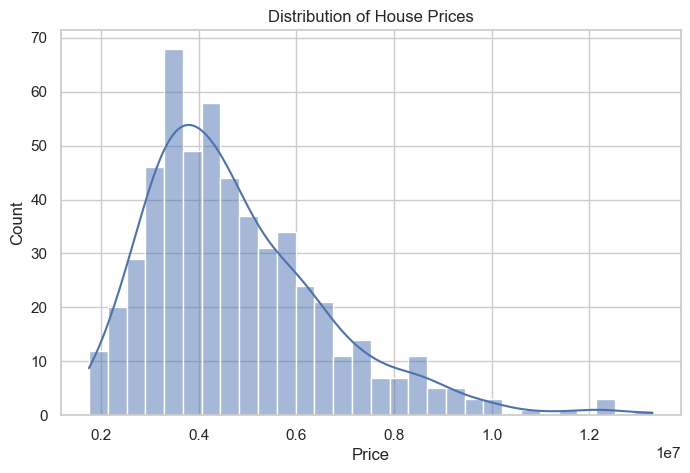

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


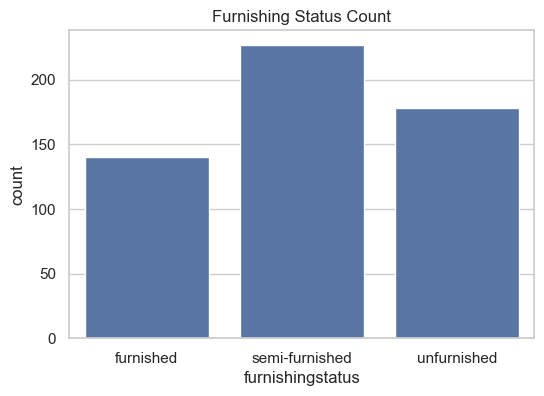

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='furnishingstatus', data=df)
plt.title("Furnishing Status Count")
plt.show()


In [8]:

print("Unique values in each column:")
print(df.nunique())


print("\nMissing values:")
print(df.isnull().sum())


df.drop_duplicates(inplace=True)
print("\nShape after removing duplicates:", df.shape)


Unique values in each column:
price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Shape after removing duplicates: (545, 13)


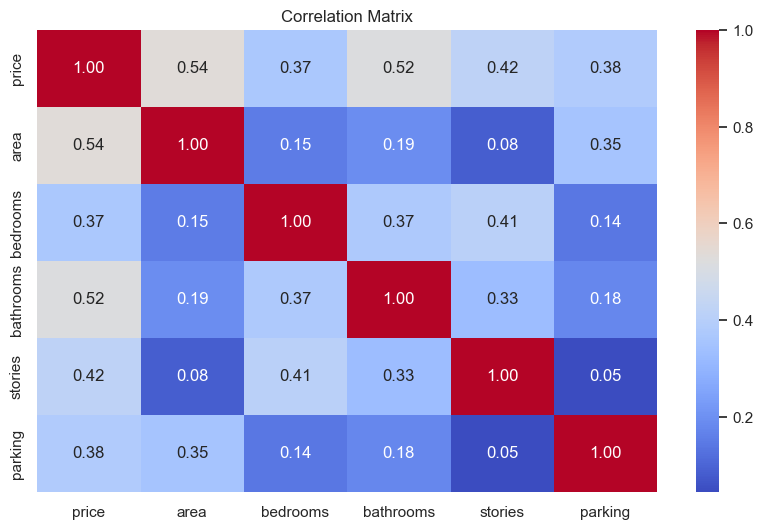

In [10]:

plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include='number')  # Only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
